In [0]:
import glob as gb     
import numpy as np
from collections import defaultdict
import re
import math

In [0]:
#function to read the corpus
def readCorpus():
    files = []
    language = []
    for f in gb.glob("ipa_corpus/corpus.ipa.*"):
        with open(f, 'r', encoding="utf8") as doc:
            data = doc.read()
            data = re.sub(r'\n', '', data)
            files = np.append(files, data)
        if (f[-2:]) == 'en': 
          language.append("English")
        elif (f[-2:]) == 'es': 
          language.append("Spanish")
        elif (f[-2:]) == 'fr': 
          language.append("French")
        elif (f[-2:]) == 'it': 
          language.append("Italian")
    return files, language
  #Note that in the corpus, we removed \n and : as they are not phonemes

In [0]:
#the files and the languages are read from the corpus
files, lang = readCorpus()

In [0]:
#create a list of phonmes list
def getPhonemesList(files):
  langPhoneList=[]
  for x in files:
    langPhoneList.append(list(x))
  return langPhoneList

In [0]:
#get the phonemes list from all lists
langphonemes=getPhonemesList(files)

Excercise 1.1 a

In [0]:
#get the unique set of phonemes 
import itertools
def UniqueSetPhon(langphonemes):
  #merge the lists in langPhonemes
  unifiedPhoneList=list(itertools.chain.from_iterable(langphonemes))
  unifiedPhoneList = list(dict.fromkeys(unifiedPhoneList))
  return unifiedPhoneList

In [0]:
#get the list of unique set of phonems
uniquePhonesSet=UniqueSetPhon(langphonemes)

In [0]:
#a count of all the phonemes per language
from collections import Counter
def countLanSymbols(files):
  listCount=[]
  for x in files:
    listCount.append(Counter(x))
  return listCount

In [0]:
#get the list of dictionaries of all the phonemes per language
listOfSymbpL=countLanSymbols(files)

In [0]:
#create the default_dic for the dictionaries
listDDict=[]
for x in listOfSymbpL:
  d=dict(x)
  my_default_dict = defaultdict(float,d)
  listDDict.append(my_default_dict)

Lidstone smoothing with alpha = 1 

In [0]:
# Lidstone smoothing with alpha = 1 was done here and applied to the corpus at once
for dicts in listDDict:
  totalDic=sum(dicts.values())
  for xs in uniquePhonesSet:
    dicts[xs]=(dicts[xs]+1)/(len(uniquePhonesSet)+totalDic)

In [0]:
#code to test  the probability
def test_probabilty():
  precision = 10**-8
  for dicts in listDDict:
    P_sum=sum(dicts.values())
    assert abs(1.0 - P_sum) < precision, 'Probability mass does not sum up to one.'
    print('TEST SUCCESSFUL!')           

In [19]:
test_probabilty()

TEST SUCCESSFUL!
TEST SUCCESSFUL!
TEST SUCCESSFUL!
TEST SUCCESSFUL!


Excercise 1.1b

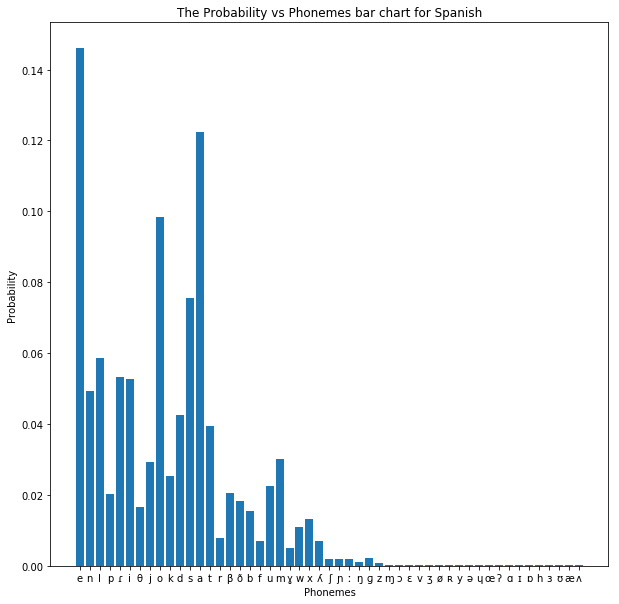

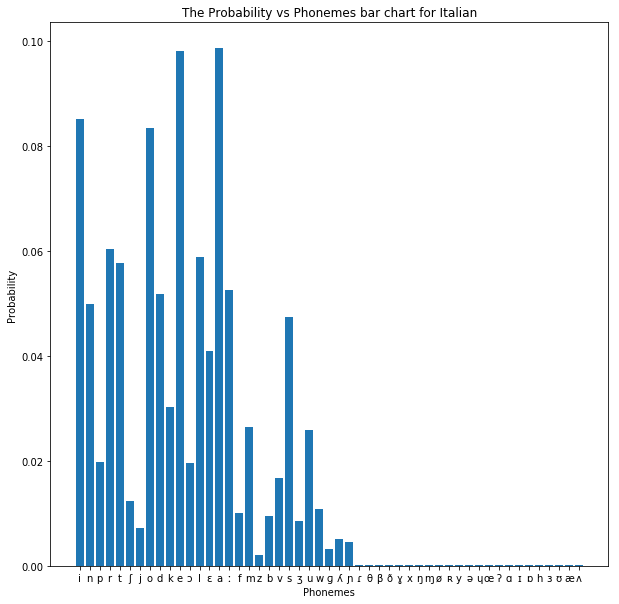

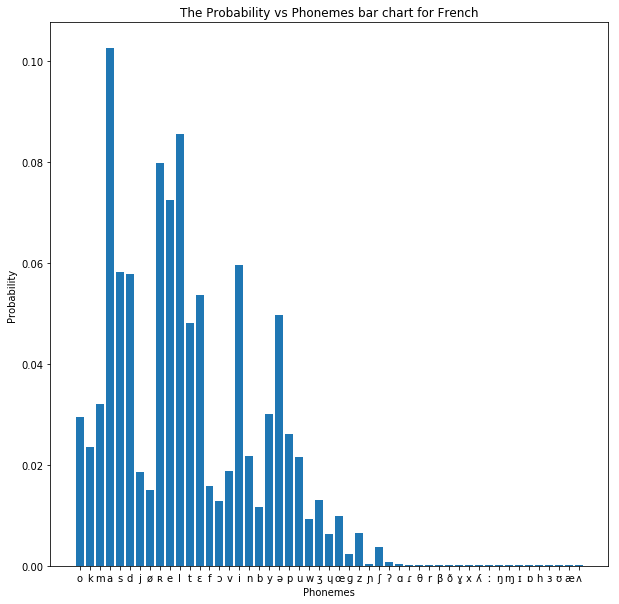

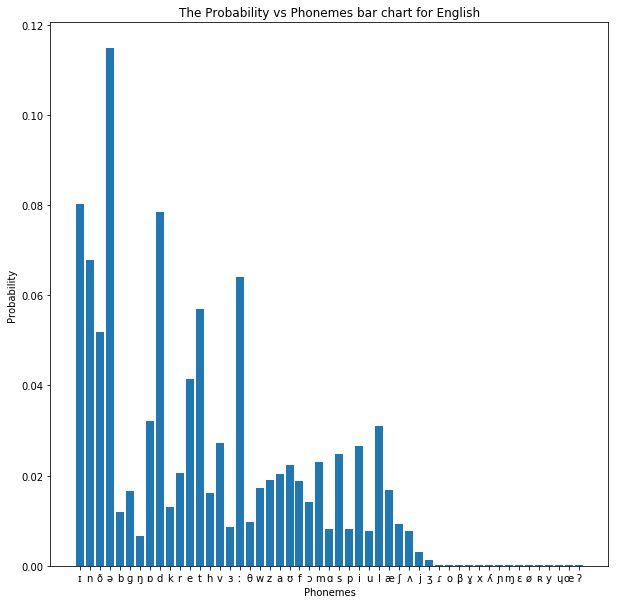

In [20]:
import matplotlib.pyplot as plt
for i in range(0,4):
  plt.figure(figsize=(10, 10))
  plt.title("The Probability vs Phonemes bar chart for "+ lang[i])
  plt.xlabel("Phonemes")
  plt.ylabel("Probability")
  plt.bar(*zip(*listDDict[i].items()))
  plt.savefig(lang[i]+"_PP_Chart")
  plt.show()

Excercise 1.1c

In [0]:
#the KL divergence function
def KL_divergence(uniqueSet,dict1,dict2):
  sumperp=0.0
  for x in uniqueSet:
    sumperp+=(dict1[x]*math.log(dict1[x]/dict2[x],2))
  return sumperp   

In [0]:
values=list(range(0,len(lang)))
w, h = len(values), len(values);
Matrix = [[0 for x in range(w)] for y in range(h)] 
for i in values:
  for j in values:
    kl1=KL_divergence(uniquePhonesSet,listDDict[i],listDDict[j])
    Matrix[i][j]=  kl1
    

In [23]:
import pandas
pandas.DataFrame(Matrix, lang, lang)

,Spanish,Italian,French,English
Spanish,0.000000,1.124912,1.375226,2.538803
Italian,1.070310,0.000000,1.195454,1.871228
French,2.288149,1.607801,0.000000,2.421670
English,3.446139,3.181661,2.821796,0.000000
